## Exercise 3.5 The Continuous Investment Model

Import packages, classes and settings:

In [1]:
import numpy as np
import math
import itertools
from scipy import optimize
import scipy.stats as stats
import PS1 as func
# For plots:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('seaborn-whitegrid')
mpl.style.use('seaborn')
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Initialize model:

In [2]:
Model_1 = func.contInvest() # Model instance for exercise 3.5
Model_1.solve() # solve model with default parameter values.

The solution converged.


The plotting facilities for this class are given by:

In [3]:
Model_1.plots

{'plot_eu': 'Plots the utility of entrepreneur on a grid of assets when behaving/not behaving.',
 'plot_interactive_sol': 'Plots the equilibrium outcome, the unconstrained solution and the binding IC constraint on a grid of assets.'}

### Consider the continuous the continuous investment model with decreasing returns to scale outlined in chapter 3 of JT. The core of the model is as follows:
- Let $I\in[0, \infty)$ be the level of investment in a given project.
- Entrepreneur proposes a project. If successful the project generates income $R(I)$; if not the project generates $0$.
- The probability of success depends on the behavior of the entrepreneur. If E behaves $(b)$ then probability of success is $p_H\in(0,1)$. If E does not behave $(nb)$ then the probability of success is $p_L$ where $0\leq p_L<p_H$. 
- The entrepreneur has an incentive to not behave $(nb)$, as he receives $BI$ in private benefits in this case.
- The entrepreneur is endowed with A in assets.
- No investment project is profitable, if entrepreneur chooses not to behave. 
- The entrepreneur's technology obeys the following conditions:
    1. Positive, but decreasing returns to investments: $R'(I)>0, R''(I)<0$. 
    2. *Regularity condition 1:* Under perfect information a positive investment level would be optimal, i.e. $R'(0)>1/p_H$. 
    3. *Regularity condition 2:* Under perfect information a finite level of investment is optiaml, i.e. $ lim_{I\rightarrow \infty} R'(I) < 1/p_H$. 
- Assume perfect competition between lenders.
    


#### The Entrepreneurial problem, part I

The first part of the entrepreneur's problem is the discrete choice: $b$ or $nb$. The utility from each choice is given by:

$$\begin{align} 
u_b &= p_HR_b(I)-A \\
u_{nb}&= p_LR_b(I)+BI-A.
\end{align}$$

The **incentive compatability constraint (IC)** is the threshold when option $b$ is preferred. This is defined as:

$$\begin{align}
u_b-u_{nb}\geq 0 && \Rightarrow && \Delta p R_b(I) \geq BI, \tag{IC}
\end{align}$$

where $\Delta p \equiv p_H-p_L$.


Note, the IC constraint is independent of the level of assets $(A)$. Furthermore, with regularity assumptions 1-2 it looks as follows:

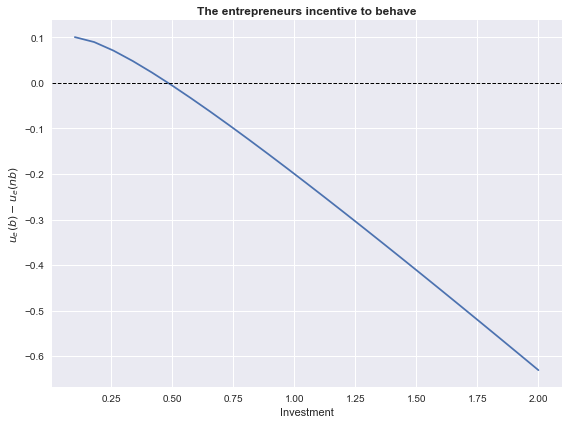

In [4]:
Model_1.plot_eu()

#### The lender's problem:

The lender faces two problems here: (1) Risk over outcomes and (2) Moral hazard. The moral hazard comes from the entrepreneur who has an incentive to not behave, due to the potential private benfits BI. Note two observations before we set up the lender's problem:

1. The project is never profitable if the entrepreneur chooses not to behave. This implies that the **(IC)** constraint must always hold. This means that the contract $R_b(I)$ must at least secure:

$$\begin{align} 
    R_b^* = \dfrac{BI}{\Delta p}.
\end{align}$$

2. We assume that lenders operate under perfect competition. Thus in equilibrium the expected profits of a lender is driven to zero. 

With this in mind define the expected profits from the lender $\pi_l^e$ as:

$$\begin{align}
\pi_l^e = p_H \left[R(I)-R_b\right]-\left(I-A\right)\geq0 \tag{IR}
\end{align}$$

Here we have used: (1) The lender will always make sure that the entrepreneur chooses $b$. Thus we only use $p_H$ as probability of success. (2) The lender offers $I-A$ for the project, as the entrepreneur puts up $A$ himself. The lender thus only enters into any contract, if his **rationality constraint (IR)** holds, i.e. if $\pi_l^e\geq0$. 


#### The Entrepreneurial problem, part II

The entrepreneur knows that to land a contract, lender will always offer a contract ensuring that the **(IC)** constraint holds. Thus he only considers the outcomes where he behaves. Using that there are perfect competition for lenders, the entrepreneur chooses an $I$, such that the **(IR)** constraint holds with equality. The utility in this scenario for the entrepreneur is then given by:

$$\begin{align} 
    u_b &= p_H R_b(I) -A \\ 
        &= p_H R(I)-I,
\end{align}$$ 
where $p_HR_b(I)$ is substituted for using the **(IR)** constraint. The problem of the entrepreneur that recognizes all of the above is then given by:


$$ \begin{align} 
    \max_{I} p_HR(I)-I, && \text{s.t. }\overbrace{p_H\left[R(I)-\dfrac{BI}{\Delta p}\right]}^{\text{IR constraint s.t. IC constraint}}\geq I-A
\end{align}$$ 

The constraint states that the entrepreneur recognizes the IR constraint of the lender **and** that the lender offers an **IC** binding contract. Denote this the **(IR-IC)** constraint.

The first order condition characterizing the solution is then given by:

$$ \begin{align} 
    p_HR'(I) &= 1+\dfrac{\mu}{1+\mu} \dfrac{p_HB}{\Delta p}\geq 1,  \tag{FOC 1} 
\end{align} $$

along with the Karush-Kuhn-Tucker conditions

$$ \begin{align} 
    \mu\left[p_H\left(R(I)-\dfrac{BI}{\Delta p}\right)-(I-A)\right]=0, && \mu\geq 0, &&  p_H\left(R(I)-\dfrac{BI}{\Delta p}\right)-(I-A)\geq 0 \tag{FOC 2 / KKT}
\end{align} $$






.


## Q1: How does investments vary with assets A?

Let us start with some comments on the solution: 
* Note that if the **(IR-IC)** constraint is **not** binding, the shadow-variable $\mu=0$ and the optimum is given by $p_HR'(I) =1$.
* If the **(IR-IC)** constraint **is** binding, the level of $I$ is determined entirely from the **(IR-IC)** constraint.

In the following we use the $R(I)$ function $R(I) = I^p$. Note that we require $1>p_H>p_L>0$ and $p\in(0,1)$.

The following illustrates the equilibrium investment level on a grid of assets. It is plotted as an *interactive widget* allowing you to play around with a couple of parameter values, and see the effect on the equilibrium. 

In [5]:
Model_1.plot_interactive_sol()

interactive(children=(SelectionSlider(description='Probability, $p_H$', options=(0.6, 0.61, 0.62, 0.64, 0.65, …

**Results/comments:**

* If $A$ is sufficiently large $\Rightarrow \mu=0$ and $I$ is efficiently chosen.
* If not $\mu>0$ and investments are suboptimally low. The reason for this is the **moral hazard** of the scheme:
    * The entrepreneur receives private benefits of $BI$ from not behaving.
    * If $A$ is low entrepreneurs have to borrow a lot. 
    * The private benefits from not behaving increases linearly with I; thus the lender has to offer a contract with linearly increasing benefits $R_b$ to avoid the bad behavior. 
    * For the lender to avoid negative profits (IR constraint), the price of borrowing is increased. 
    * The marginal benefits of the loan decreases with the size $(R''(I)<0)$. Thus if the loan is too large the optimal level $I^*$ will not be financed.
    

## Q2: How does the shadow-value of assets vary with A?

Let us start by defining how the optimal choice of investments $(I)$ change with A:

* If the IC constraint is not binding (when A is large), I was independent of A. Define the threshold $\bar{A}$ as the level where the IC constraint is no longer binding.
* If the IC constraint is binding, A increases $I$. Define the implicit function $I(A)$. By total differentiation of IC we then have:

$$ \begin{align}
    p_H\left[R'(I) -\dfrac{B}{\Delta p}\right]\dfrac{dI}{dA} = \dfrac{dI}{dA}-1, && \text{for }A<\bar{A},
\end{align} $$ 

and otherwise 0. Isolating for $dI/dA$ we then have:

$$\begin{align} 
    \dfrac{dI}{dA} = \dfrac{1}{1-p_HR'(I)+\frac{p_HB}{\Delta p}}> 0, && \text{for }A<\bar{A}, \tag{MMIE}
\end{align} $$

where the denominator is positive. To see this substitute for (FOC 1) to get

$$ \begin{align}
1-p_HR'(I) + \frac{pH B}{\Delta p} = \underbrace{-\dfrac{\mu}{1+\mu}\dfrac{p_HB}{\Delta p}}_{\text{from FOC 1}}+\dfrac{p_HB}{\Delta p}  = \dfrac{p_HB}{\Delta p}\dfrac{1}{1+\mu}>0
\end{align} $$


Finally, what is then the shadow value of A? Differentiate the utility function:

$$ \begin{align} 
    \dfrac{du_b}{dA} &= \left[p_HR'(I)-1\right]\dfrac{dI}{dA} \\ 
                     &= \underbrace{\dfrac{\mu}{1+\mu}\dfrac{p_H B}{\Delta p}}_{\text{From FOC 1}}\dfrac{dI}{dA}. \tag{SVE}
\end{align} $$

**Comments for the results:**

* When $A>\bar{A}: du/dA=0$. When A is large enough the optimal level of investments is ensured; sufficient access to credit.
* When $A<\bar{A}: du/dA>0$. When the entrepreneur is constrained in his investment, an increase in A relaxes credit constraint. 
* The term $dI/dA$ in (MMIE) is the Marginal Multiplier of Initial Equity. 
* The term $du/dA$ in (SVE) is the Shadow Value of Equity. In the face of imperfect information and moral hazard, the famous Modigliani and Miller (1963) result that the source of financing does not matter, breaks down. 
